In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'keypoint.csv'
model_save_path = 'models/keypoint_classifier.hdf5'
tflite_save_path = 'models/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 12

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),  # Increased units
    tf.keras.layers.BatchNormalization(),  # Added Batch Normalization
    tf.keras.layers.Dropout(0.3),  # Adjusted dropout rate
    tf.keras.layers.Dense(64, activation='relu'),  # Increased units
    tf.keras.layers.BatchNormalization(),  # Added Batch Normalization
    tf.keras.layers.Dense(32, activation='relu'),  # Increased units
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 128)               5504      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
es_callback

In [13]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000




60/71 [========================>.....] - ETA: 0s - loss: 2.6788 - accuracy: 0.1046
Epoch 1: saving model to models\keypoint_classifier.hdf5
71/71 [==============================] - 3s 8ms/step - loss: 2.6562 - accuracy: 0.1080 - val_loss: 2.4707 - val_accuracy: 0.1470
Epoch 2/1000
62/71 [=========================>....] - ETA: 0s - loss: 2.4460 - accuracy: 0.1429

c:\Users\Ian\git\553.806_Capstone_HandGesture\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to models\keypoint_classifier.hdf5
71/71 [==============================] - 0s 4ms/step - loss: 2.4411 - accuracy: 0.1449 - val_loss: 2.4288 - val_accuracy: 0.1620
Epoch 3/1000
62/71 [=========================>....] - ETA: 0s - loss: 2.3703 - accuracy: 0.1763
Epoch 3: saving model to models\keypoint_classifier.hdf5
71/71 [==============================] - 0s 4ms/step - loss: 2.3669 - accuracy: 0.1767 - val_loss: 2.3518 - val_accuracy: 0.2333
Epoch 4/1000
59/71 [=======================>......] - ETA: 0s - loss: 2.3250 - accuracy: 0.1878
Epoch 4: saving model to models\keypoint_classifier.hdf5
71/71 [==============================] - 0s 4ms/step - loss: 2.3210 - accuracy: 0.1892 - val_loss: 2.2351 - val_accuracy: 0.2577
Epoch 5/1000
59/71 [=======================>......] - ETA: 0s - loss: 2.2819 - accuracy: 0.2030
Epoch 5: saving model to models\keypoint_classifier.hdf5
71/71 [==============================] - 0s 4ms/step - loss: 2.2773 - accuracy: 0.2033 - val_los

In [14]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

 1/24 [>.............................] - ETA: 0s - loss: 0.7077 - accuracy: 0.7109

24/24 [==============================] - 0s 2ms/step - loss: 0.7311 - accuracy: 0.7030


In [15]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [16]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 151ms/step
[3.4343198e-10 9.9968159e-01 1.3335182e-06 4.1070916e-09 1.2383232e-08
 7.0065631e-05 1.7069331e-08 1.6536785e-04 6.9388829e-05 3.2903432e-07
 1.1778256e-05 2.1845715e-08]
1


# Confusion matrix

94/94 [==============================] - 0s 1ms/step


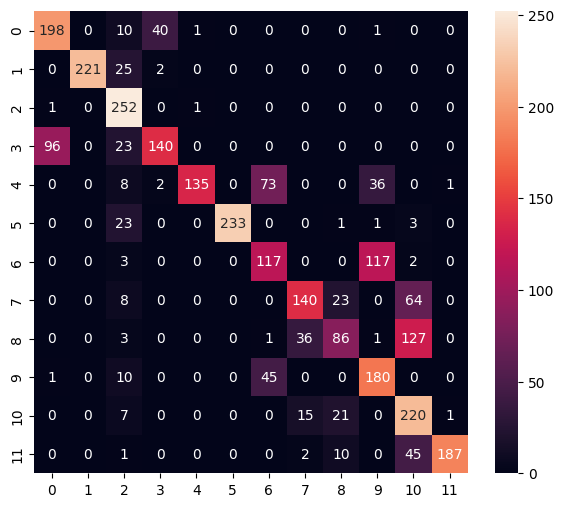

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       250
           1       1.00      0.89      0.94       248
           2       0.68      0.99      0.80       254
           3       0.76      0.54      0.63       259
           4       0.99      0.53      0.69       255
           5       1.00      0.89      0.94       261
           6       0.50      0.49      0.49       239
           7       0.73      0.60      0.65       235
           8       0.61      0.34      0.44       254
           9       0.54      0.76      0.63       236
          10       0.48      0.83      0.61       264
          11       0.99      0.76      0.86       245

    accuracy                           0.70      3000
   macro avg       0.74      0.70      0.70      3000
weighted avg       0.74      0.70      0.70      3000



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [18]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\Users\Ian\git\553.806_Capstone_HandGesture\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Ian\AppData\Local\Temp\tmplafa5s5x\assets


INFO:tensorflow:Assets written to: C:\Users\Ian\AppData\Local\Temp\tmplafa5s5x\assets


21304

# Inference test

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [21]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.5649169e-11 9.9979383e-01 1.5419258e-07 7.1386874e-10 3.6136714e-09
 3.9303475e-05 3.2538814e-09 1.2507640e-04 3.6954531e-05 7.2288380e-08
 4.4636017e-06 1.3618824e-08]
1
